In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks([0,1], [target_names[0],target_names[1]], rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    


In [1]:
#build and load weights
from HSTLens_resnet_2class_arch12 import deeplens_classifier

model_num='55'
epoch_num ='14'

my_model = deeplens_classifier(n_epochs=8, batch_size=32)
my_model._build() 
my_model.model.load_weights(
    '/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/weights/2arch12_'+model_num+'/epoch_weights000000'+epoch_num+'.h5')#("weights/2_class_weights_dim")


Using TensorFlow backend.


building arch 11
arch 12


## make predictions

In [37]:
'''
for using the manually cleaned negatives.
'''

from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale

#----------------------------------------------------------------------------------------------------------------------------------------------------------------
test_crowded = np.load('datasets/test_crowded_conf.npy')

    
predictions_crowded  = my_model._predict(test_crowded, y= None, discrete = False)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------
test_neg = np.load('datasets/test_neg_conf.npy')

predictions_neg  = my_model._predict(test_neg, y= None, discrete = False)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------
pos_v = np.load('datasets/test_pos_conf.npy')

predictions_pos  = my_model._predict(pos_v, y= None, discrete = False)




...Generating Predictions ...
...Generating Predictions ...
...Generating Predictions ...


## tally up predictions

In [38]:
pos_tally = {0:0,1:0}
for prediction in predictions_pos:
    if prediction>0.50:
        pos_tally[1]+=1.
    else:
        pos_tally[0]+=1.

# for i in pos_tally:
#     pos_tally[i]=round(pos_tally[i]/len(predictions_pos), 4)
#----------------------------------------------------------------------------------------------------------------------------------------------------------------


neg_tally = {0:0,1:0}
for prediction in predictions_neg:
    if prediction>0.50:
        neg_tally[1]+=1.
    else:
        neg_tally[0]+=1.

# for i in neg_tally:
#     neg_tally[i]= round(neg_tally[i]/len(predictions_neg),4)
    
#----------------------------------------------------------------------------------------------------------------------------------------------------------------

crowded_tally = {0:0,1:0}
for prediction in predictions_crowded:
    if prediction>0.50:
        crowded_tally[1]+=1.
    else:
        crowded_tally[0]+=1.
    
# for i in crowded_tally:
#     crowded_tally[i]=round(crowded_tally[i]/len(predictions_crowded),4)
    
pos_tally, neg_tally,crowded_tally

({0: 184.0, 1: 2316.0}, {0: 2366.0, 1: 134.0}, {0: 2488.0, 1: 12.0})

In [36]:
predictions_pos.shape, predictions_neg.shape, predictions_crowded.shape

((2500, 1), (2500, 1), (2500, 1))

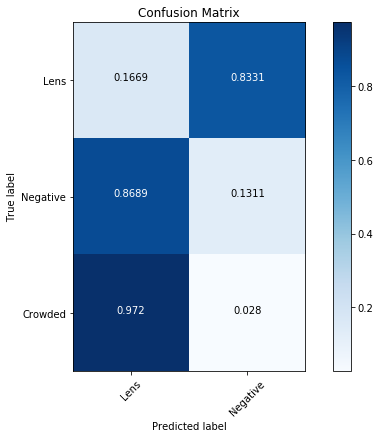

In [12]:


plot_confusion_matrix(cm           = np.array([[ pos_tally[0], pos_tally[1]],
                                              [ neg_tally[0], neg_tally[1]],
                                              [ crowded_tally[0], crowded_tally[1]]]), 
                      normalize    = False,
                      target_names = ['Lens', 'Negative', 'Crowded'],
                      title        = "Confusion Matrix")

